In [1]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from scripts.print_features_bar import print_features_bar

In [2]:
titanic = pd.read_csv('../data/Titanic-Dataset.csv')

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Attualmente sembrano esserci:
177 persone con età sconosciuta
687 con Cabin sconosciuta
2 persone con Embarked sconosciuto

il tutto su 891 righe.

da qui posso dire che ha senso ignorare il campo Cabin, mentre bisogna fare un analisi piu approfondita su età e Embarked

In [5]:
X = titanic.drop(['Survived', 'PassengerId', 'Cabin'], axis=1)

y = titanic['Survived'].values

In [6]:
print(f'tipo age: {type(X.Age[0])}, tipo Embarked: {type(X.Embarked[0])}')

tipo age: <class 'numpy.float64'>, tipo Embarked: <class 'str'>


Age è float, Embarked è string

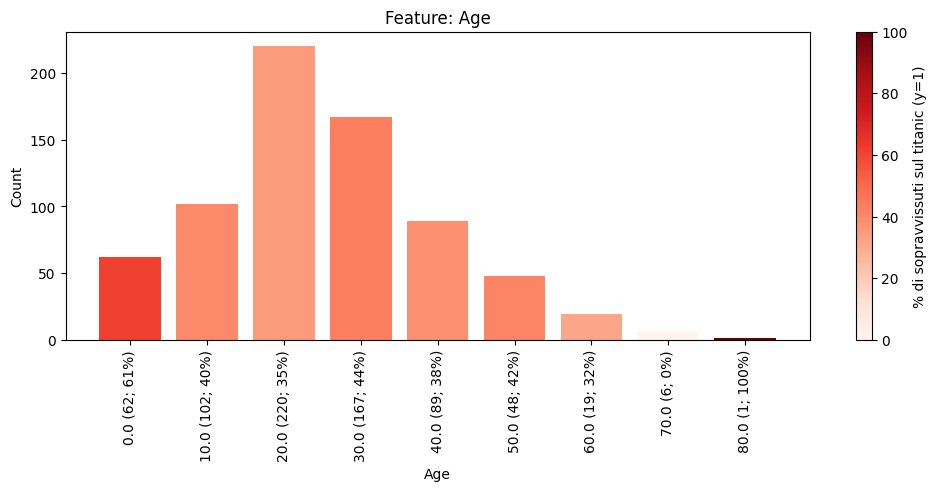

In [7]:
print_features_bar(X, 'Age', y, grouping=10)

In [8]:
X['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
X['age_is_null'] = X['Age'].isnull()

In [10]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_is_null
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,False
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,True
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,False


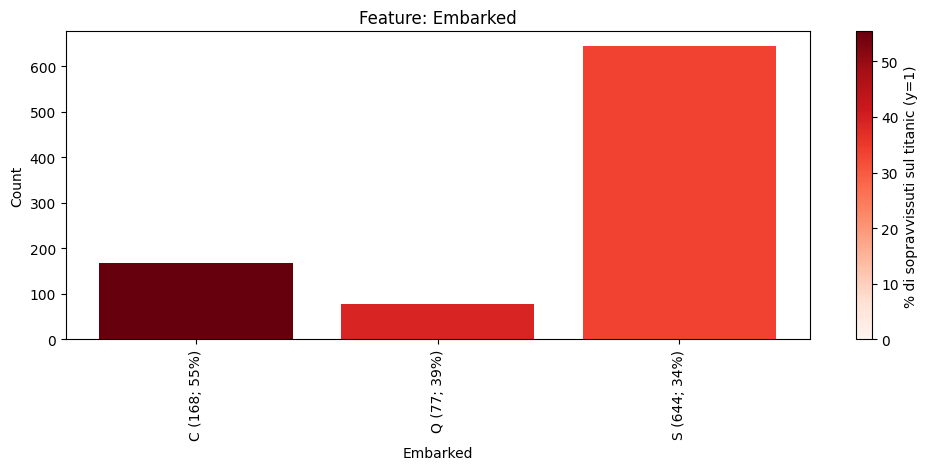

In [11]:
print_features_bar(X, 'Embarked', y, type='categorical')

i passeggeri imbarcati a C hanno avuto significativamente più probabilità di sopravvivere rispetto a quelli di S e Q

i dati Age saranno gestiti con una predizione, mentre i dati Embarked saranno gestiti con la moda

In [12]:
X['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

ora facciamo un analisi più completa dei dati per capire se ha senso rimuovere qualche altra feature

In [13]:
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns


In [14]:
X['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

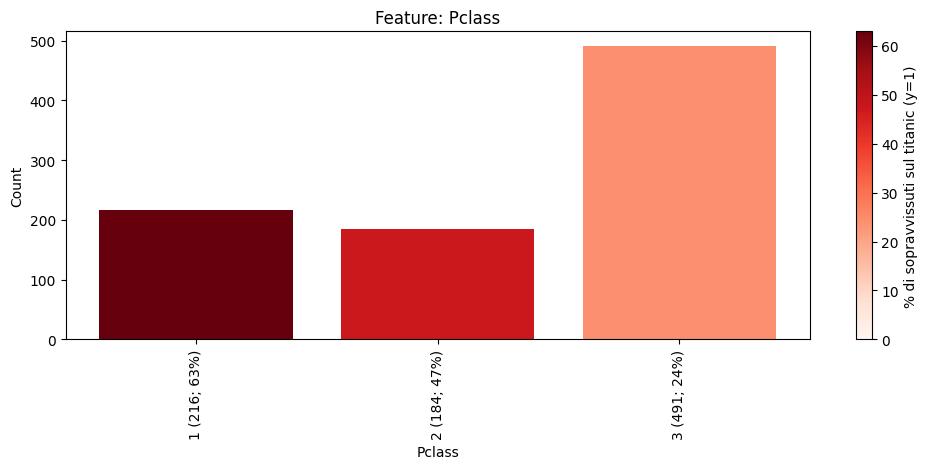

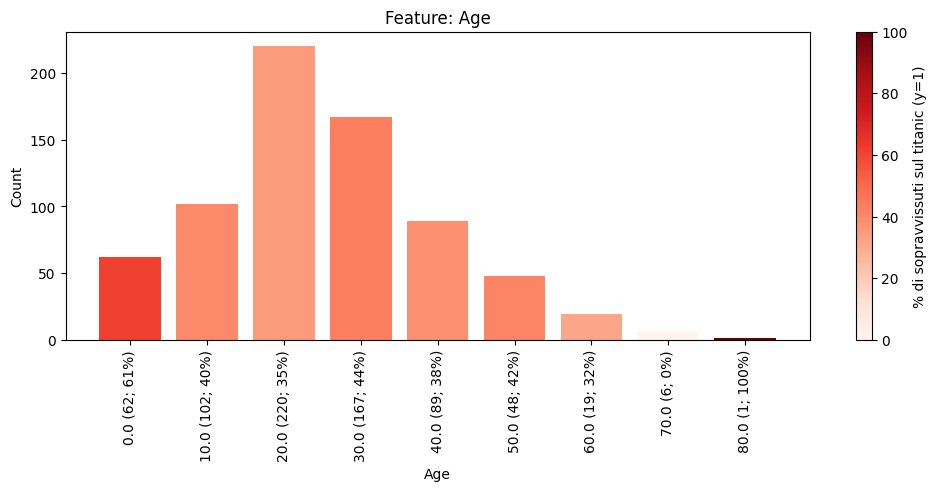

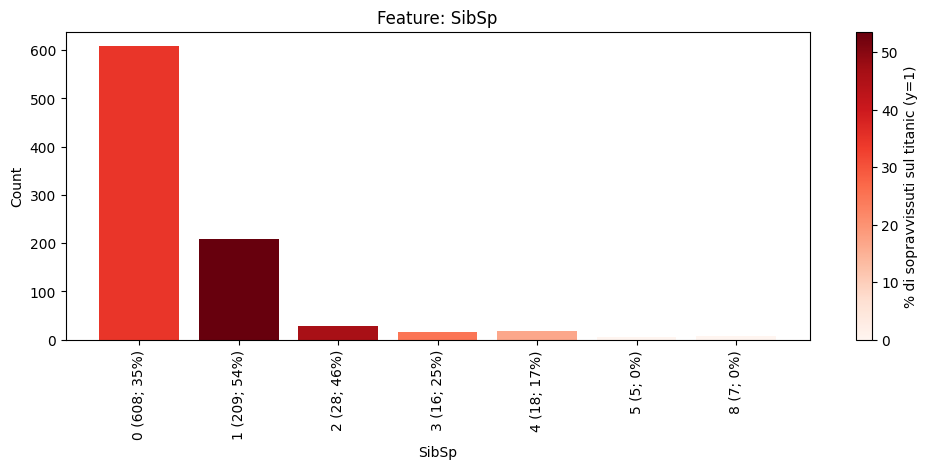

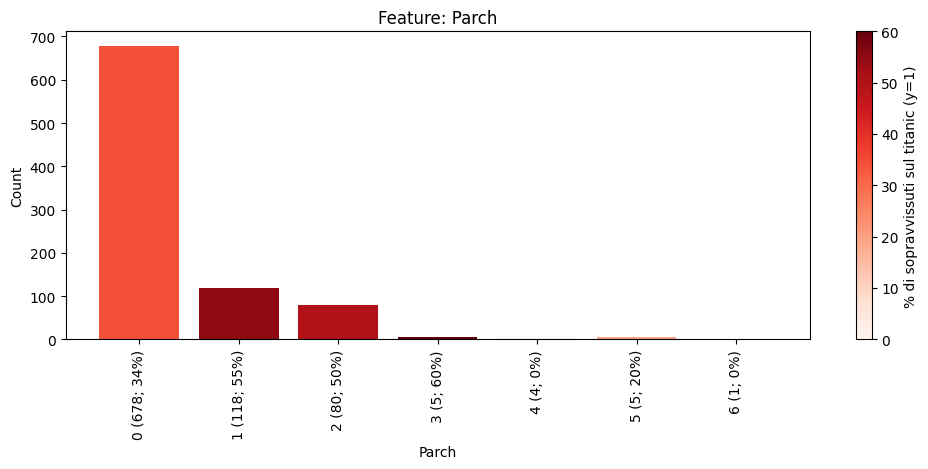

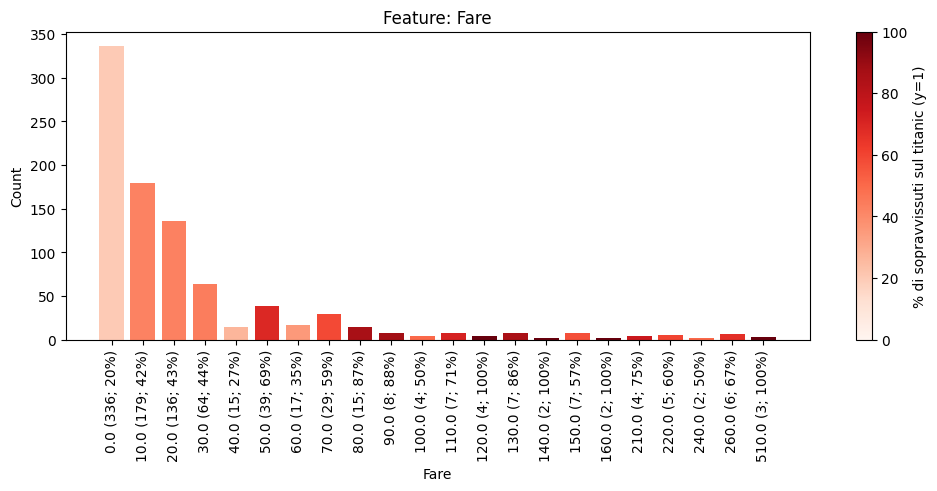

In [15]:
grouping = {
    'Pclass': 1,
    'Age': 10,
    'SibSp': 1,
    'Parch': 1,
    'Fare': 10,
}
for feature in numerical_features:
    print_features_bar(X, feature, y, grouping=grouping[feature])

ora unirò i parametri Parch (parent child) e SibSp (persone del nucleo famigliare) per capire il numero di famiglie

In [16]:
X['FamilySize'] = X['SibSp'] + X['Parch'] + 1  


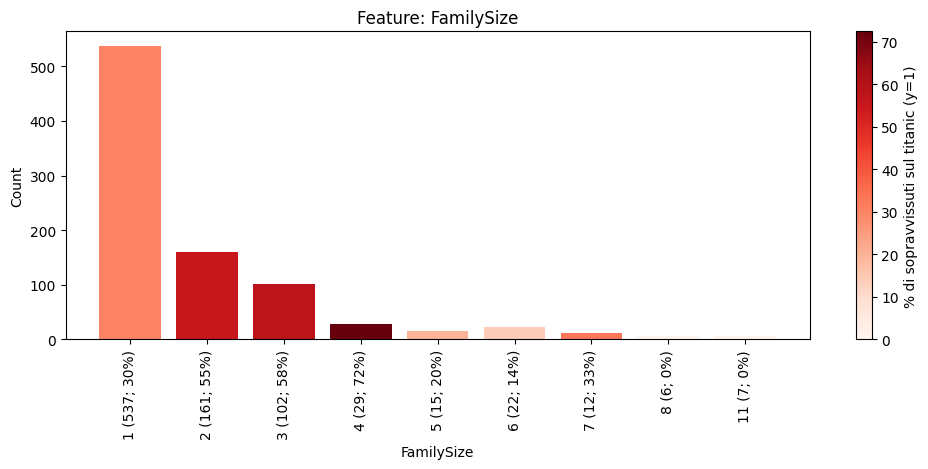

In [17]:
print_features_bar(X, 'FamilySize', y, grouping=1 ) # grouping=grouping[feature]

sembra che le probabilità di sopravvivenzsiano alte nei nuclei famigliari fino a 4 persone, ma i dati sono troppo pochi per essere considerati attendibili, proviamo a fare un cluster di nuclei fino a 4 persone

In [18]:
single_persons = y[X['FamilySize'] == 1]
small_families = y[X['FamilySize'].between(2,4, inclusive='both')]
big_families = y[X['FamilySize'] > 4]

ora calcolo la percentuale

100:x=totale:parziale => parziale*100/totale

In [19]:
def calculatePercentage(y, class_to_perc):
  return (len(y[y == class_to_perc])*100)/len(y)

In [20]:
print(f'percentuale di single sopravvissuti: {calculatePercentage(single_persons, 1)}% su {len(single_persons)} persone')
print(f'percentuale di piccole famiglie sopravvissute: {calculatePercentage(small_families, 1)}% su {len(small_families)} persone')
print(f'percentuale di grandi famiglie sopravvissute: {calculatePercentage(big_families, 1)}% su {len(big_families)} persone')

percentuale di single sopravvissuti: 30.353817504655492% su 537 persone
percentuale di piccole famiglie sopravvissute: 57.87671232876713% su 292 persone
percentuale di grandi famiglie sopravvissute: 16.129032258064516% su 62 persone


probabilmente è molto più efficace utilizzare 3 categorie, IsAlone, IsSmallFamily e IsBigFamily in modo da avere relazioni più lineari sulle probabilità di sopravvivenza

In [21]:
X['IsAlone'] = X['FamilySize'] == 1
X['IsSmallFamily'] = X['FamilySize'].between(2,4, inclusive='both')
X['IsBigFamily'] = X['FamilySize'] > 4
X = X.drop(['FamilySize', 'SibSp', 'Parch'], axis=1)

In [22]:
X

,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,age_is_null,IsAlone,IsSmallFamily,IsBigFamily
0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,False,False,True,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,False,False,True,False
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,False,True,False,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,False,False,True,False
4,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,False,True,False,False
887,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,False,True,False,False
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,S,True,False,True,False
889,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,False,True,False,False


è possibile eliminare biglietto e prezzo in quanto abbiamo già l'informazione della classe, quindi questi parametri non ci danno alcuna informazione utile, piuttosto potrebbero darci false informazioni facendoci credere che a volte uno possa aver pagato di meno ma magari ha usufruito di uno sconto importante

In [23]:
X = X.drop(['Ticket', 'Fare'], axis=1)

In [24]:
X

,Pclass,Name,Sex,Age,Embarked,age_is_null,IsAlone,IsSmallFamily,IsBigFamily
0,3,"Braund, Mr. Owen Harris",male,22.0,S,False,False,True,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,False,False,True,False
2,3,"Heikkinen, Miss. Laina",female,26.0,S,False,True,False,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,False,False,True,False
4,3,"Allen, Mr. William Henry",male,35.0,S,False,True,False,False
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,S,False,True,False,False
887,1,"Graham, Miss. Margaret Edith",female,19.0,S,False,True,False,False
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,S,True,False,True,False
889,1,"Behr, Mr. Karl Howell",male,26.0,C,False,True,False,False


Embarked lo tengo perchè, sebbene possa essere un indicatore socio economico pari alla classe aggiunge informazioni su lingua parlata e posizione, quindi potrebbe influire in modo aggiuntivo alla classe di imbarco, elimino invece la feature Name

In [25]:
X = X.drop(['Name'], axis=1)

In [26]:
X

,Pclass,Sex,Age,Embarked,age_is_null,IsAlone,IsSmallFamily,IsBigFamily
0,3,male,22.0,S,False,False,True,False
1,1,female,38.0,C,False,False,True,False
2,3,female,26.0,S,False,True,False,False
3,1,female,35.0,S,False,False,True,False
4,3,male,35.0,S,False,True,False,False
...,...,...,...,...,...,...,...,...
886,2,male,27.0,S,False,True,False,False
887,1,female,19.0,S,False,True,False,False
888,3,female,NaN,S,True,False,True,False
889,1,male,26.0,C,False,True,False,False


In [27]:
X.isnull().sum()

Pclass             0
Sex                0
Age              177
Embarked           2
age_is_null        0
IsAlone            0
IsSmallFamily      0
IsBigFamily        0
dtype: int64

In [28]:
X['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

sostituisco i valori nan con -1

In [29]:
X[X['Age'].isnull()]['Age'] = -1

C:\Users\David\AppData\Local\Temp\ipykernel_29608\2999347245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X['Age'].isnull()]['Age'] = -1


In [30]:
X['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

ora inserisco dei parametri per le età che conosco

In [31]:
X[X['Age'].between(0,12, inclusive='both')]['Age']

7      2.00
10     4.00
16     2.00
24     8.00
43     3.00
       ... 
827    1.00
831    0.83
850    4.00
852    9.00
869    4.00
Name: Age, Length: 69, dtype: float64

In [32]:
X['isChild'] = X['Age'].between(0,12, inclusive='both')
X['isTeen'] = X['Age'].between(13,18, inclusive='both')
X['isAdult'] = X['Age'].between(19,35, inclusive='both')
X['isSenior'] = X['Age'].between(36,59, inclusive='both')
X['isOld'] = X['Age'] >= 60

In [33]:
X

,Pclass,Sex,Age,Embarked,age_is_null,IsAlone,IsSmallFamily,IsBigFamily,isChild,isTeen,isAdult,isSenior,isOld
0,3,male,22.0,S,False,False,True,False,False,False,True,False,False
1,1,female,38.0,C,False,False,True,False,False,False,False,True,False
2,3,female,26.0,S,False,True,False,False,False,False,True,False,False
3,1,female,35.0,S,False,False,True,False,False,False,True,False,False
4,3,male,35.0,S,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,S,False,True,False,False,False,False,True,False,False
887,1,female,19.0,S,False,True,False,False,False,False,True,False,False
888,3,female,NaN,S,True,False,True,False,False,False,False,False,False
889,1,male,26.0,C,False,True,False,False,False,False,True,False,False


ora rimuovo l'età

In [34]:
X = X.drop(['Age'], axis=1)

In [35]:
X

,Pclass,Sex,Embarked,age_is_null,IsAlone,IsSmallFamily,IsBigFamily,isChild,isTeen,isAdult,isSenior,isOld
0,3,male,S,False,False,True,False,False,False,True,False,False
1,1,female,C,False,False,True,False,False,False,False,True,False
2,3,female,S,False,True,False,False,False,False,True,False,False
3,1,female,S,False,False,True,False,False,False,True,False,False
4,3,male,S,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,S,False,True,False,False,False,False,True,False,False
887,1,female,S,False,True,False,False,False,False,True,False,False
888,3,female,S,True,False,True,False,False,False,False,False,False
889,1,male,C,False,True,False,False,False,False,True,False,False


In [36]:
X.isnull().sum()

Pclass           0
Sex              0
Embarked         2
age_is_null      0
IsAlone          0
IsSmallFamily    0
IsBigFamily      0
isChild          0
isTeen           0
isAdult          0
isSenior         0
isOld            0
dtype: int64

la variabile pclass la gestirei come categorica e a questo punto non avrei più alcuna variabile gestibile come numerica

In [37]:
X['FirstClass'] = X['Pclass'] == 1
X['SecondClass'] = X['Pclass'] == 2
X['ThirdClass'] = X['Pclass'] == 3
X = X.drop(['Pclass'], axis=1)
X


,Sex,Embarked,age_is_null,IsAlone,IsSmallFamily,IsBigFamily,isChild,isTeen,isAdult,isSenior,isOld,FirstClass,SecondClass,ThirdClass
0,male,S,False,False,True,False,False,False,True,False,False,False,False,True
1,female,C,False,False,True,False,False,False,False,True,False,True,False,False
2,female,S,False,True,False,False,False,False,True,False,False,False,False,True
3,female,S,False,False,True,False,False,False,True,False,False,True,False,False
4,male,S,False,True,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,False,True,False,False,False,False,True,False,False,False,True,False
887,female,S,False,True,False,False,False,False,True,False,False,True,False,False
888,female,S,True,False,True,False,False,False,False,False,False,False,False,True
889,male,C,False,True,False,False,False,False,True,False,False,True,False,False


In [38]:
# calculatePercentage
print(f'Embarked S:{len(X[X['Embarked']=='S'])}')
print(f'Embarked C:{len(X[X['Embarked']=='C'])}')
print(f'Embarked Q:{len(X[X['Embarked']=='Q'])}')

Embarked S:644
Embarked C:168
Embarked Q:77


la maggior parte degli imbarcati risulta a S, di conseguenza considererò i 2 casi a nan in base alla moda

In [39]:
X['EmbarkedS'] = (X['Embarked'] == 'S') | (X['Embarked'].isnull())
X['EmbarkedC'] = X['Embarked'] == 'C'
X['EmbarkedQ'] = X['Embarked'] == 'Q'
X = X.drop(['Embarked'], axis=1)
X

,Sex,age_is_null,IsAlone,IsSmallFamily,IsBigFamily,isChild,isTeen,isAdult,isSenior,isOld,FirstClass,SecondClass,ThirdClass,EmbarkedS,EmbarkedC,EmbarkedQ
0,male,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False
1,female,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False
2,female,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False
3,female,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False
4,male,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False
887,female,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
888,female,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False
889,male,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False


In [40]:
X['Male'] = X['Sex'] == 'male'
X = X.drop(['Sex'], axis=1)
X

,age_is_null,IsAlone,IsSmallFamily,IsBigFamily,isChild,isTeen,isAdult,isSenior,isOld,FirstClass,SecondClass,ThirdClass,EmbarkedS,EmbarkedC,EmbarkedQ,Male
0,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,True
1,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False
2,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False
3,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True
887,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False
888,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False
889,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,True


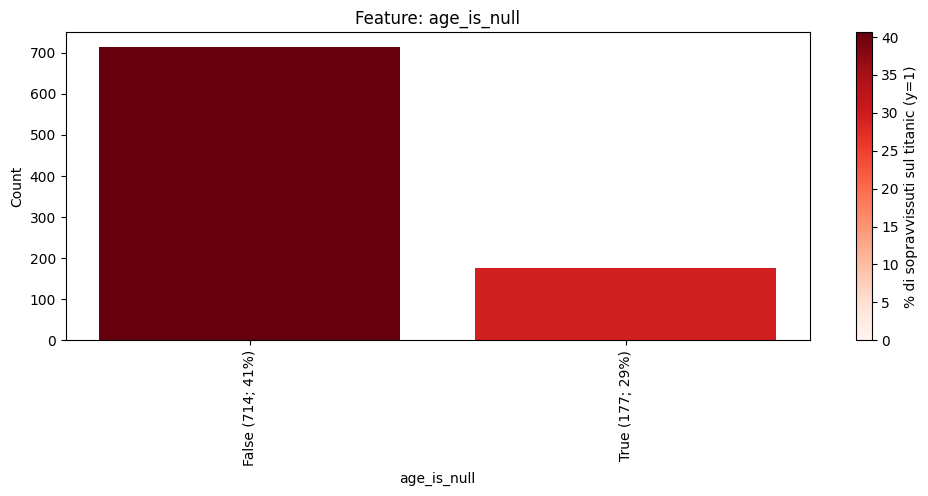

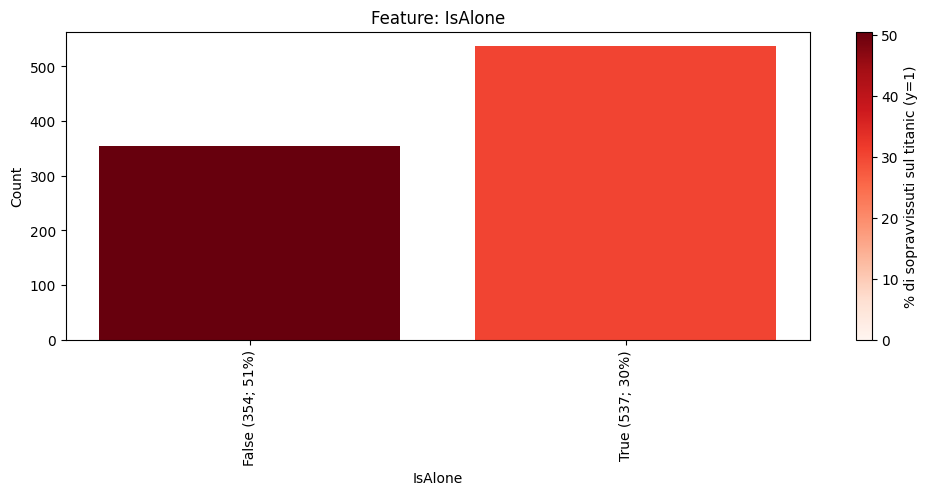

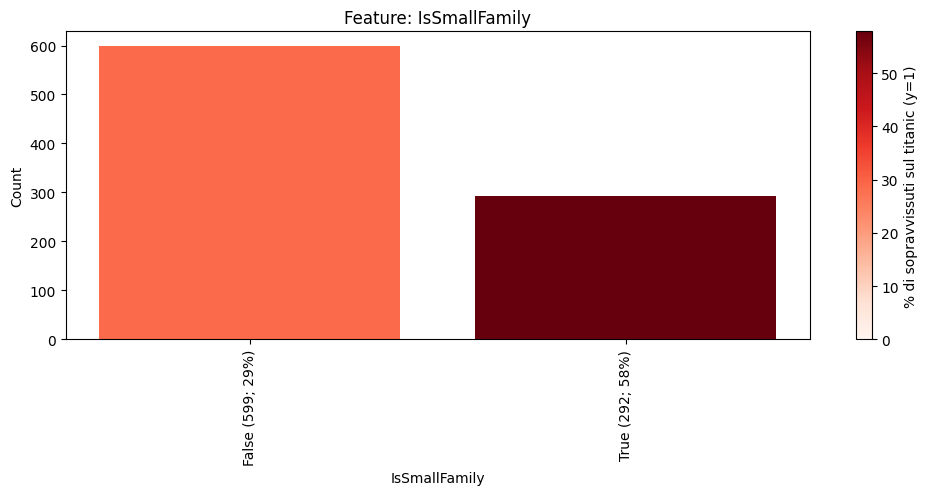

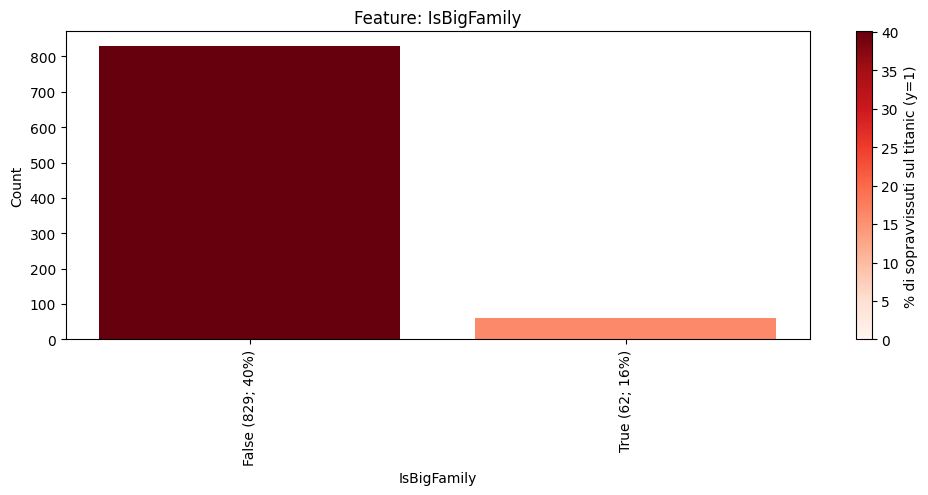

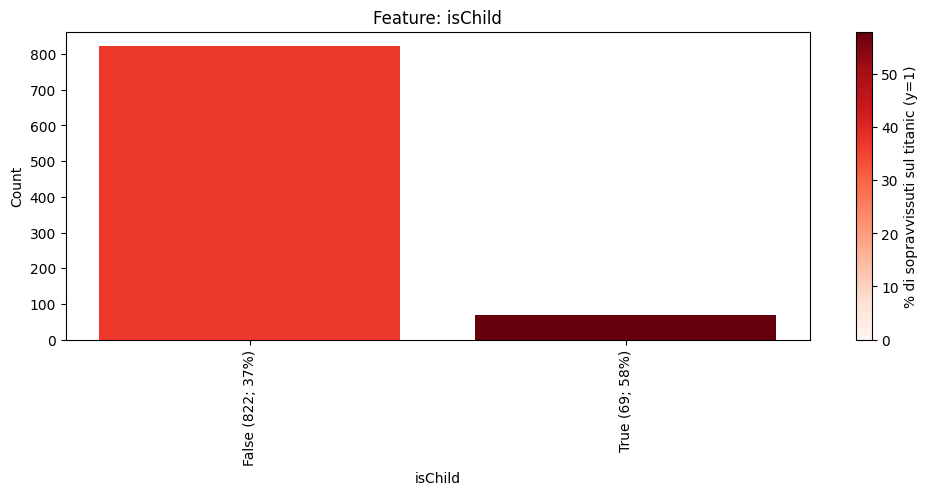

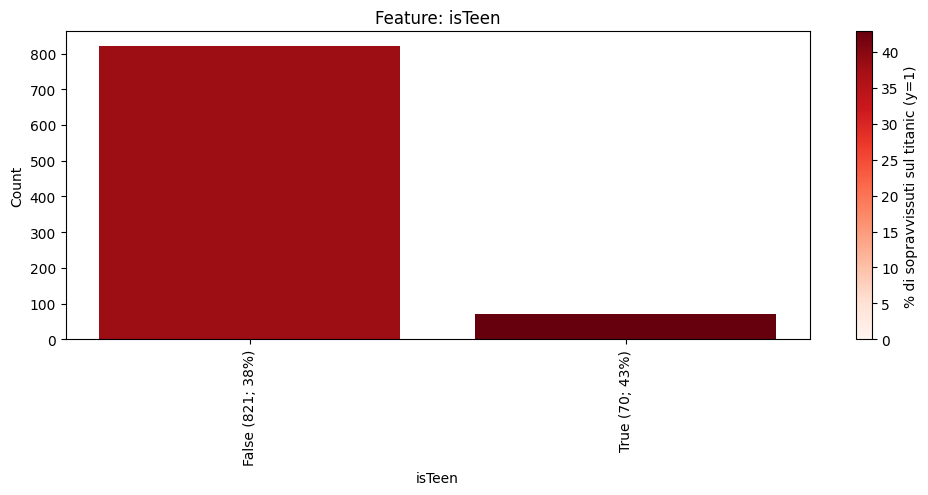

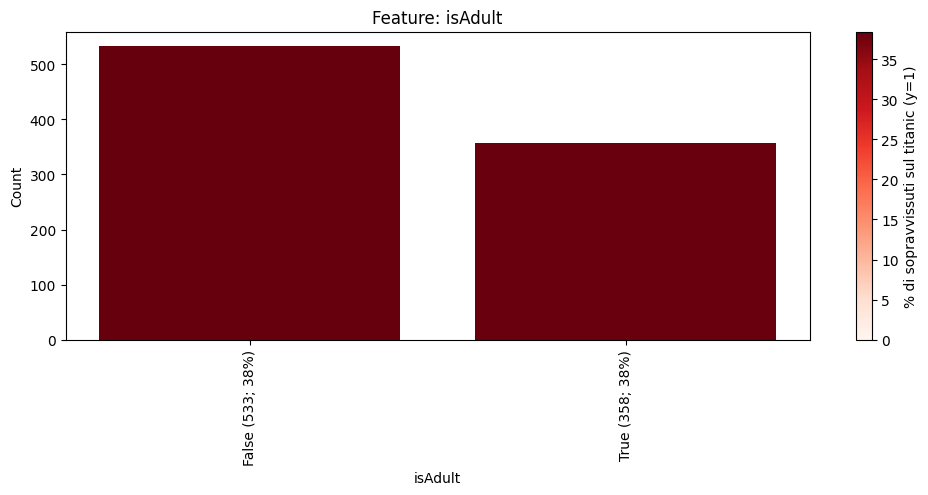

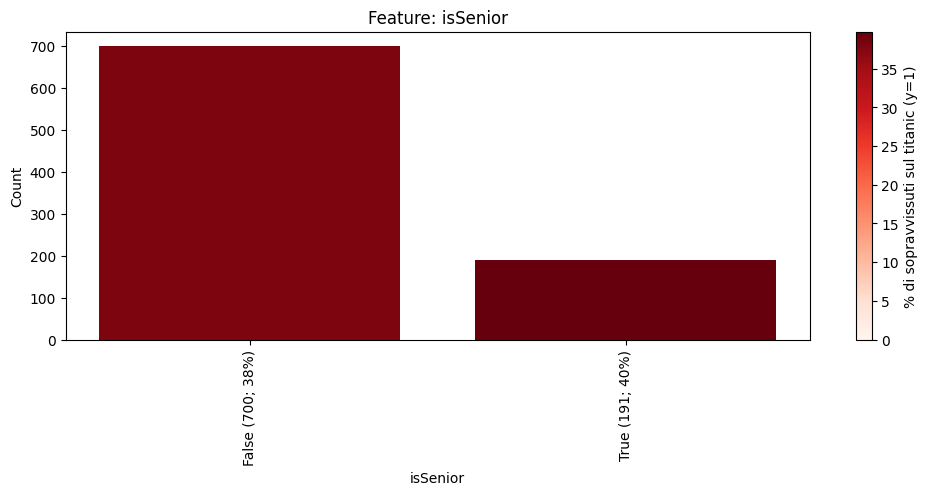

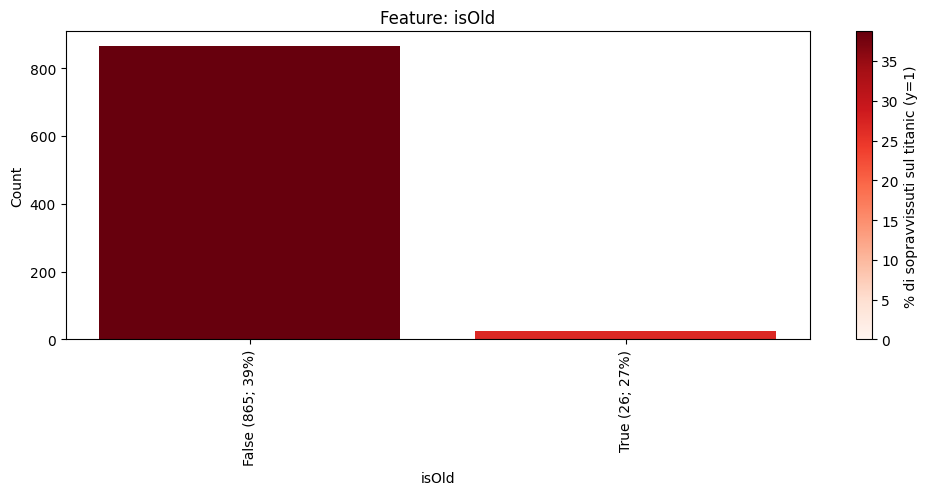

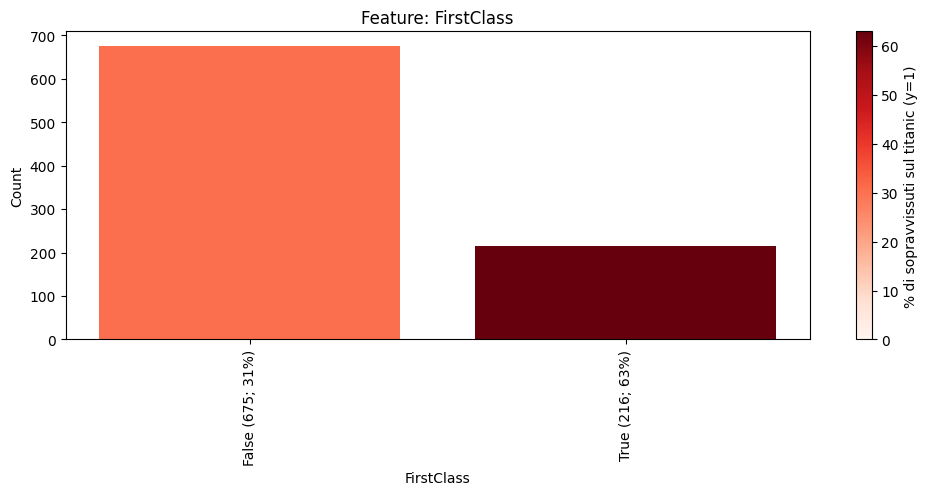

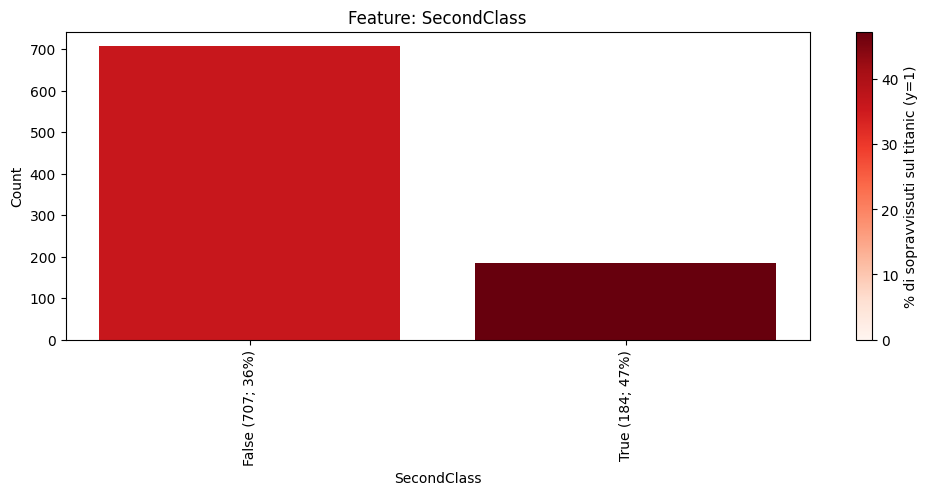

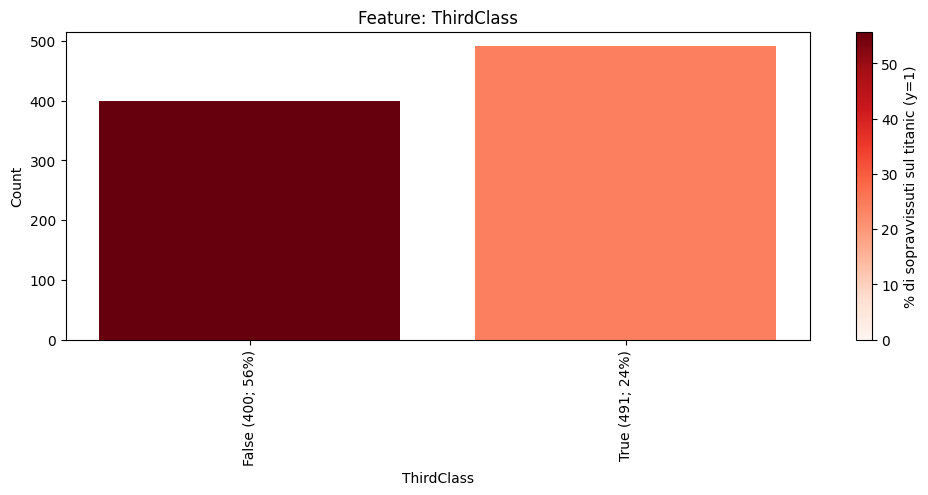

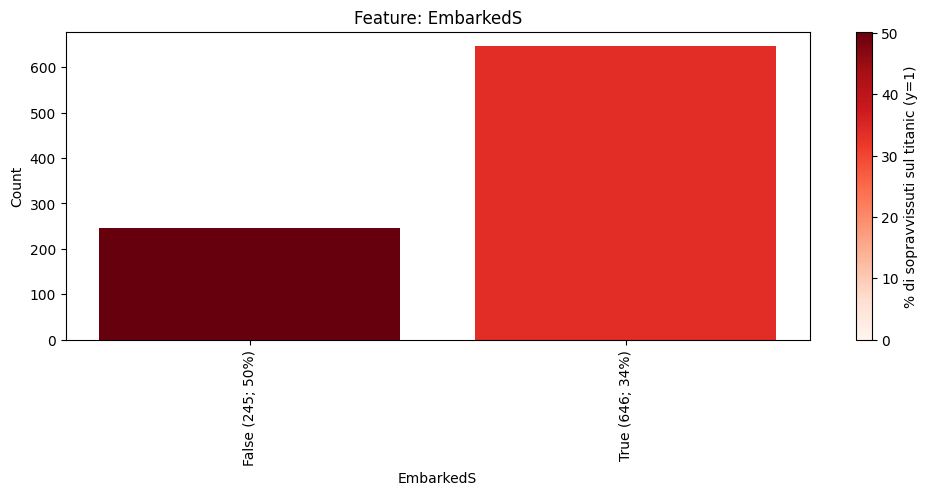

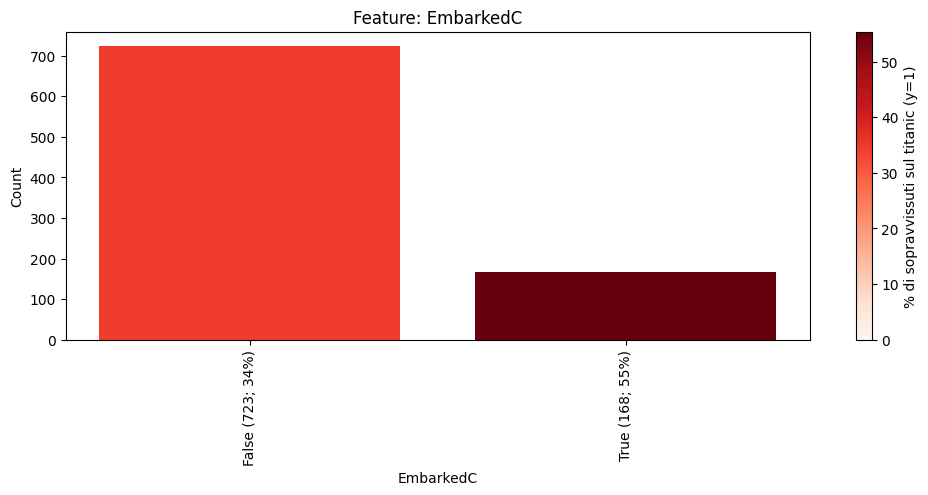

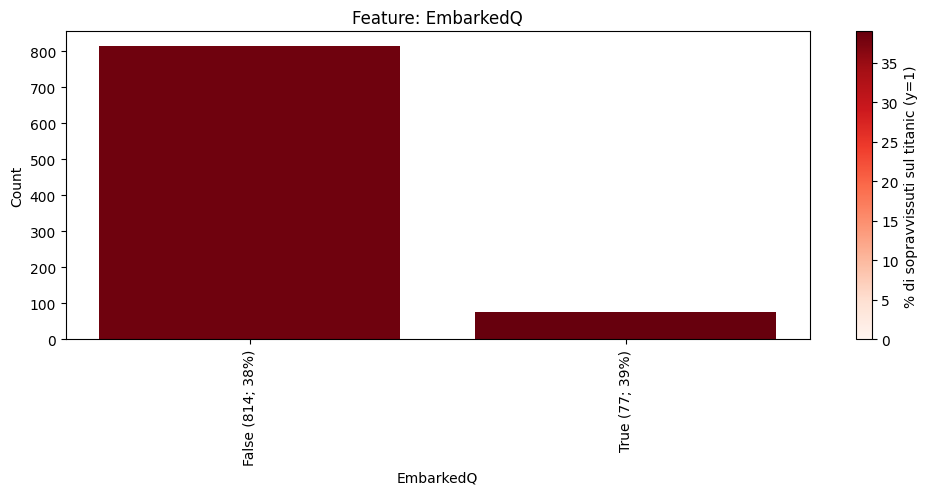

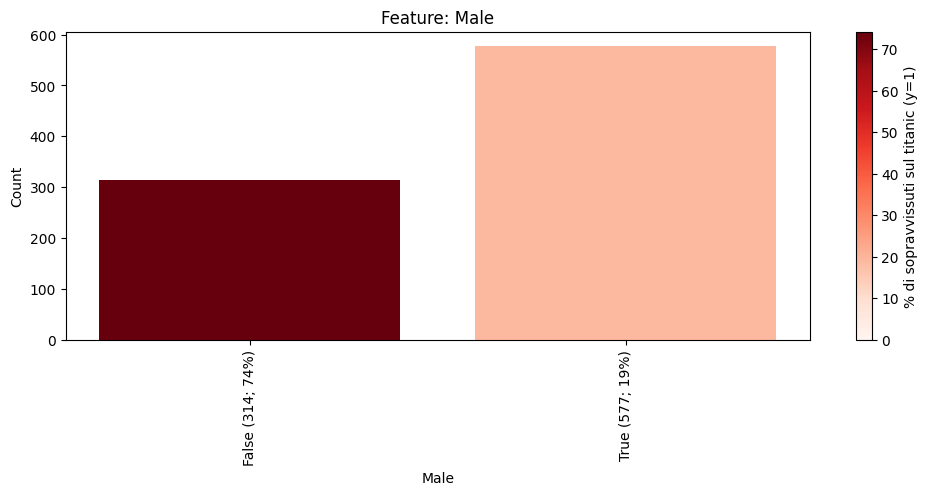

In [41]:
columns = X.columns
for col in columns:
  print_features_bar(X, col, y, type='categorical' ) # grouping=grouping[feature]

Attualmente ho trasformato il dataset originario basato sulle features:

| id |column | nonnull-cols | type
| :--- | :--- |  :--- |  :--- | 
| 0 |  PassengerId | 891  | int64  
| 1 |  Survived | 891  | int64  
| 2 |  Pclass | 891  | int64  
| 3 |  Name | 891  | object 
| 4 |  Sex | 891  | object 
| 5 |  Age | 714  | float64
| 6 |  SibSp | 891  | int64  
| 7 |  Parch | 891  | int64  
| 8 |  Ticket | 891  | object 
| 9 |  Fare | 891  | float64
| 10 | Cabin | 204  | object 
| 11 | Embarked | 889  | object 


nel seguente dataset

| Parametro | F | T | Type
| :--- | :--- | :--- | :--- |
| age_is_null | 41% | 29% | boolean |
| IsAlone | 51% | 30% | boolean |
| IsSmallFamily | 29% | 58% | boolean |
| IsBigFamily | 40% | 16% | boolean |
| isChild | 37% | 58% | boolean |
| isTeen | 38% | 43% | boolean |
| isAdult | 38% | 38% | boolean |
| isSenior | 38% | 40% | boolean |
| isOld | 39% | 27% | boolean |
| FirstClass | 31% | 63% | boolean |
| SecondClass | 36% | 47% | boolean |
| ThirdClass | 56% | 24% | boolean |
| EmbarkedS | 50% | 34% | boolean |
| EmbarkedC | 34% | 55% | boolean |
| EmbarkedQ | 38% | 39% | boolean |
| Male | 74% | 19% | boolean |

Credo che questo sia migliore per il machine learning in quanto basato solo su features booleane, particolarmente buono per modelli basati su alberi decisionali.
è possibile creare una funzione ad hoc per la trasformazione del primo modello nel secondo
